# Pilot annotation stats notebook

**Objective**

- Create descriptive stats for LabelStudeio `pilot` annotations.


**Data**

The Pilot data was extracted from the following files:
- box/Annotation_Pilot_(English)_completed_bckp.json
- box/Annotation_Pilot_(Spanish)_completed_bckp.json

How to prepare the data:
- All the data was extracted using `..exports.json_parser` outputs
- 1: cd to `../data_wrangling/exports/`
- 2: open `json_parser.py` and change the `LS_EXPORTED_FILE_NAME` to the name of your `*_bckp` file
- 3: run `python json_parser.py -diarisation -turn -interview`
- 4: copy the csv output files from `../data_wrangling/exports/output` to `./data/`

There are three types of data. Here is what we'd like to extract from them at this stage:
- pilot_interview_annotation_\[lang\].csv
  - Get descriptive stats for MITI global ratings per MITI construct
  - Calculate MITI spirit rating
  - Calculate correlations between MITI interview and turn constructs
  - Calculate correlations between MITI interview constructs and participant/coach turn length ratio
- pilot_turn_annotation_\[lang\].csv
  - Get descriptive stats for MITI turn constructs
  - Calculate correlations between MITI interview and turn constructs
  - Get descriptive stats for MITI turn techniques
- pilot_turn_diarisation_\[lang\].csv
  - Calculate turn lengths
  - Get descriptive stats for turn lengths (coach vs participant)
  - Calculate correlations between MITI interview constructs and participant/coach turn length ratio

We decided to have one designated annotator per language to use their annotations as ground truth
- English: Sarah: Interviews 2\*, 3, 4, 5, and 6\*
  - There are not 5 fully annotated interviews
  - \*Interview 2 does not have turn annotations
  - \*Interview 6 does not have interview global rating annotations
- Spanish: Damian: Interviews 8, 9, and 10

**Notes**

- Version 1.0. Numbers for SBM conference abstract.
- Should run with Python==3.0+
- Created by Damian Romero, Fall 2021

--------------------------------------------

## Imports, global variables, etc

In [1]:
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

In [2]:
%matplotlib inline

In [3]:
# Type the language and press `Enter`, then run the rest of the notebook
language = input("Select language: English or Spanish:... ")

Select language: English or Spanish:... en


In [4]:
# input/output prefixes
INPUT_PREFIX = "./data/"
OUTPUT_PREFIX = "./output/pilot_"

# Create global variables based on language
if language.lower().startswith("e"):
    ANNOTATOR = 'sarahjwright'
    LANGUAGE = "English"
    LANGUAGE_SUFFIX = '_en'
else:
    ANNOTATOR = 'damianiji'
    LANGUAGE = "Spanish"
    LANGUAGE_SUFFIX = '_es'

print(f"You are running this notebook for `{LANGUAGE}` pilot annotations.\nThe annotator on record is `{ANNOTATOR}`")

You are running this notebook for `English` pilot annotations.
The annotator on record is `sarahjwright`


In [5]:
# Create dictionaries from annotation codebook for later output

miti_constructs_dict = {}
miti_techniques_dict = {}

with open(INPUT_PREFIX + "pilot_annotation_codebook.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:  # Skip column names
            line_count += 1
            continue
        elif row[1] == "coach_constructs_bad" or row[1] == "coach_constructs_good":
            miti_constructs_dict[row[2]] = 0
            # print(row[1])
            line_count += 1
        elif row[1] == "coach_techniques_adherence" or row[1] == "coach_techniques_other":
            miti_techniques_dict[row[2]] = 0
            # print(row[1])
            line_count += 1

In [6]:
# Input-output

def csv_file_to_df(partial_file_name:str, drop_interview:int = None):
    """Reads in csv files and turns them into pandas dataframes
    
    There were a couple of issues with Sarah's annotations
      So we need to drop certain interviews.
      - Turn annotation: Did not annotate interview #2
      - Interviw annotation: Did not annotate interview #6
    """

    csv_to_read = INPUT_PREFIX + partial_file_name + LANGUAGE_SUFFIX + ".csv"
    df = pd.read_csv(csv_to_read)

    if drop_interview:
        return df[df.interview_id != drop_interview]
    else:
        return df

def out_csv_from_dict(out_dict:dict, partial_file_name:str, fieldnames:list):
    """Create csv files from a dictionary by language. Takes two fieldnames only.
    usage: out_csv_from_dict(miti_techniques_dict, "miti_techniques", fieldnames = ["annotation", "count"])"""
    with open(OUTPUT_PREFIX + partial_file_name + LANGUAGE_SUFFIX + ".csv", "w") as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for key, value in out_dict.items():
            writer.writerow({fieldnames[0]: key, fieldnames[1]: value})

In [7]:
# Calculate correlations
# NOTE: in the end these were not used

def corr_interview_turn_constructs(interview_constructs, turn_constructs):
    """Calculate correlations between MITI interview and turn constructs"""
    corr_mat = np.corrcoef(interview_constructs, turn_constructs)
    return corr_mat[0,1]

def corr_interview_constructs_turn_ratio(interview_constructs, turn_length_ratio):
    """Calculate correlations between MITI interview and turn constructs"""
    corr_mat = np.corrcoef(interview_constructs, turn_length_ratio)
    return corr_mat[0,1]

--------------------------------------------

## MITI interview annotation

- Dataset: pilot_interview_annotation_[lang].csv
- Contents: Sarah's and Damian's MITI Global Ratings

In [8]:
# Import data into pandas and query the dataframe

# Drop interview #6 due to no English annotations
if LANGUAGE == "English":
    interview_df = csv_file_to_df('pilot_interview_annotation', 6)
else:
    interview_df = csv_file_to_df('pilot_interview_annotation')

print(" *****************\n",
      "interview_df info\n",
      "*****************\n",)
print(interview_df.info())

print("\n *****************\n",
      "interview_df head\n",
      "*****************\n",)

display(Markdown(interview_df.head().to_markdown()))

 *****************
 interview_df info
 *****************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 44
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   task_id           40 non-null     int64 
 1   wav_file_name     40 non-null     object
 2   interview_id      40 non-null     int64 
 3   annotator_id      40 non-null     object
 4   annotation_id     40 non-null     object
 5   variable_type     40 non-null     object
 6   variable_subtype  40 non-null     object
 7   rating            40 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ KB
None

 *****************
 interview_df head
 *****************



|    |   task_id | wav_file_name                          |   interview_id | annotator_id   | annotation_id   | variable_type   | variable_subtype           |   rating |
|---:|----------:|:---------------------------------------|---------------:|:---------------|:----------------|:----------------|:---------------------------|---------:|
|  0 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | d_TPr9pjS_      | rating          | interview_autonomy_support |        2 |
|  1 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | 1n3ZdR-4hs      | rating          | interview_direction        |        4 |
|  2 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | DYsrqsO0cm      | rating          | interview_collaboration    |        2 |
|  3 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | Rh5OugSOv7      | rating          | interview_empathy          |        2 |
|  4 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | sdynNSpyvz      | rating          | interview_evocation        |        2 |

In [9]:
# Show annotations per annotator

interview_df["annotator_id"].value_counts()

sarahjwright    20
damianiji       20
Name: annotator_id, dtype: int64

In [10]:
# Create dataframe with the language designated annotator's annotations

interview_df_annotator = interview_df[interview_df["annotator_id"] == ANNOTATOR]
interview_df_annotator.describe(include=object)

,wav_file_name,annotator_id,annotation_id,variable_type,variable_subtype
count,20,20,20,20,20
unique,4,1,20,1,5
top,RE1f175cf47d8bc64eba9b21aaec028e44.wav,sarahjwright,d_TPr9pjS_,rating,interview_autonomy_support
freq,5,20,1,20,4


In [11]:
# Get descriptive stats for MITI global ratings per MITI construct: Means accross all annotator's interviews

miti_interview_means = interview_df_annotator.groupby("variable_subtype", sort=False)["rating"].mean()
miti_interview_means

variable_subtype
interview_autonomy_support    4.25
interview_direction           4.25
interview_collaboration       3.75
interview_empathy             4.25
interview_evocation           3.25
Name: rating, dtype: float64

In [12]:
# Calculate MITI global spirit rating:

def global_spirit_rating(evocation:float, collaboration:float, autonomy_support:float):
    """Calculate Global MI Rating. Defined in MITI 3.0 as follows:
    Global Spirit Rating = (Evocation + Collaboration + Autonomy/Support) / 3"""
    return (evocation + collaboration + autonomy_support) / 3

global_rating = global_spirit_rating(miti_interview_means["interview_evocation"],
                                     miti_interview_means["interview_collaboration"],
                                     miti_interview_means["interview_autonomy_support"])

In [13]:
# Add global rating to data and send to output file

miti_interview_means_dict = miti_interview_means.to_dict()
miti_interview_means_dict["global_rating"] = global_rating

out_csv_from_dict(miti_interview_means_dict,
                   "miti_interview_constructs_means",
                   ["annotation", "score"])

In [14]:
# Calculate MITI global spirit rating for each interview

# miti_interview_means = interview_df_annotator.groupby(["interview_id","variable_subtype"], sort=True)["rating"].mean()
# miti_interview_means

interview_df_annotator_byint = interview_df_annotator[["interview_id","variable_subtype","rating"]]

interview_df_annotator_dict = interview_df_annotator_byint.groupby(["interview_id","variable_subtype"], sort=False)["rating"].mean().to_dict()

# interview_df_annotator_dict["interview_evocation"]
# interview_df_annotator_dict.to_dict()

from collections import defaultdict

interviews_global_ratings_dict = {}
evocation_collaboration_support_byint = defaultdict(dict)

for k,v in interview_df_annotator_dict.items():
    evocation_collaboration_support_byint[k[0]][k[1]] = v
evocation_collaboration_support_byint_list = sorted(evocation_collaboration_support_byint.items())

for k, v in evocation_collaboration_support_byint_list:
    print(k,v)
    global_rating = global_spirit_rating(evocation_collaboration_support_byint[k]["interview_evocation"],
                                         evocation_collaboration_support_byint[k]["interview_collaboration"],
                                         evocation_collaboration_support_byint[k]["interview_autonomy_support"])
    interviews_global_ratings_dict[k] = global_rating

interviews_global_ratings_dict


2 {'interview_autonomy_support': 5.0, 'interview_collaboration': 4.0, 'interview_direction': 5.0, 'interview_empathy': 5.0, 'interview_evocation': 4.0}
3 {'interview_autonomy_support': 2.0, 'interview_direction': 4.0, 'interview_collaboration': 2.0, 'interview_empathy': 2.0, 'interview_evocation': 2.0}
4 {'interview_autonomy_support': 5.0, 'interview_collaboration': 5.0, 'interview_direction': 5.0, 'interview_empathy': 5.0, 'interview_evocation': 4.0}
5 {'interview_autonomy_support': 5.0, 'interview_direction': 3.0, 'interview_collaboration': 4.0, 'interview_empathy': 5.0, 'interview_evocation': 3.0}


{2: 4.333333333333333, 3: 2.0, 4: 4.666666666666667, 5: 4.0}

--------------------------------------------

## Turn annotation

Dataset: pilot_turn_annotation_[lang].csv

Contents: Sarah's and Damian's turn annotations (fidelity, call content, miti techniques, etc)

In [15]:
# Import data into pandas and query the dataframe

# Drop interview #2 due to no English annotations
if LANGUAGE == "English":
    turn_df = csv_file_to_df('pilot_turn_annotation', 2)
else:
    turn_df = csv_file_to_df('pilot_turn_annotation')

print(" *****************\n",
      "interview_df info\n",
      "*****************\n",)
print(turn_df.info())

print("\n *****************\n",
      "interview_df head\n",
      "*****************\n",)

display(Markdown(turn_df.head().to_markdown()))

 *****************
 interview_df info
 *****************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   task_id           280 non-null    int64 
 1   wav_file_name     280 non-null    object
 2   interview_id      280 non-null    int64 
 3   annotator_id      280 non-null    object
 4   annotation_id     280 non-null    object
 5   variable_type     280 non-null    object
 6   variable_subtype  280 non-null    object
 7   annotation        280 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.7+ KB
None

 *****************
 interview_df head
 *****************



|    |   task_id | wav_file_name                          |   interview_id | annotator_id   | annotation_id          | variable_type   | variable_subtype       | annotation                              |
|---:|----------:|:---------------------------------------|---------------:|:---------------|:-----------------------|:----------------|:-----------------------|:----------------------------------------|
|  0 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_54igiu7vin8 | choices         | coach_fidelity         | introduce_self_and_study_name           |
|  1 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_o8hco4chh38 | choices         | coach_fidelity         | check_availability                      |
|  2 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_91fvg3qq3ug | choices         | coach_fidelity         | past_goal_review                        |
|  3 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_91fvg3qq3ug | choices         | coach_techniques_other | rfi_open                                |
|  4 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_o8dtirsfi4o | choices         | participant_mi_related | change_talk_goal_talk_and_opportunities |

In [16]:
# Show annotations per annotator

turn_annotations_df = turn_df["annotator_id"].value_counts() 
turn_annotations_without_notes_df = turn_df[turn_df.variable_type != 'textarea']["annotator_id"].value_counts()
turn_annotators_notes_df = turn_annotations_df - turn_annotations_without_notes_df

print("\n ******************************************\n",
      "N of annotations without annotator's notes\n",
      "******************************************",)
display(Markdown(turn_annotations_without_notes_df.head().to_markdown()))

print("\n ***********************\n",
      "N of annotator's notes\n",
      "***********************",)
display(Markdown(turn_annotators_notes_df.head().to_markdown()))


 ******************************************
 N of annotations without annotator's notes
 ******************************************


|              |   annotator_id |
|:-------------|---------------:|
| damianiji    |            153 |
| sarahjwright |             99 |


 ***********************
 N of annotator's notes
 ***********************


|              |   annotator_id |
|:-------------|---------------:|
| damianiji    |             19 |
| sarahjwright |              9 |

In [17]:
# Create dataframe with the language designated annotator's annotations

turn_df_annotator = turn_df[turn_df["annotator_id"] == ANNOTATOR]

# Suppress warning: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None
# Add single count per annotation_id to later use it for .count()
turn_df_annotator["count"] = [1 for x in turn_df_annotator["annotation_id"]]

# Define column names to drop later
drop_columns = ["wav_file_name", "interview_id", "annotator_id", "variable_type",
                "variable_subtype", "task_id","annotation_id"]

turn_df_annotator.describe(include=object)

,wav_file_name,annotator_id,annotation_id,variable_type,variable_subtype,annotation
count,108,108,108,108,108,108
unique,4,1,59,2,12,37
top,RE1f175cf47d8bc64eba9b21aaec028e44.wav,sarahjwright,wavesurfer_ed7230o3eso,choices,coach_techniques_other,change_talk_goal_talk_and_opportunities
freq,44,108,6,99,21,12


**Get descriptive stats for MITI turn techniques. We're interested in:**

- Choices,coach_techniques_adherence
  - giving_advice_mina
  - imposition_mina
  - confrontation_mina
  - mi_adherent_mia

- Choices,coach_techniques_other
  - rfi closed
  - rfi_open
  - reflection_simple
  - reflection_complex

In [18]:
# Create dataframes for MITI turn techniques (MIA, MINA, Other[rfi,reflections])

coach_techniques_adherence = turn_df_annotator[(turn_df_annotator["variable_subtype"] == "coach_techniques_adherence")]
coach_techniques_other = turn_df_annotator[(turn_df_annotator["variable_subtype"] == "coach_techniques_other")]
techniques = pd.concat([coach_techniques_adherence,coach_techniques_other])
techniques.drop(drop_columns,inplace=True, axis=1)
techniques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 12 to 252
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   annotation  32 non-null     object
 1   count       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [19]:
# Get counts for MITI turn techniques and write results to csv file

#TODO: count by interview `constructs_counts = constructs.groupby(["interview_id", "annotation"]).count()`
techniques_counts = techniques.groupby(["annotation"]).count()
techniques_counts_dict = techniques_counts.to_dict()["count"]

print("\n ******************************************\n",
      "miti_techniques_dict before adding counts\n",
      "******************************************\n",
      json.dumps(miti_techniques_dict, indent=2))

miti_techniques_dict.update(techniques_counts_dict)

out_csv_from_dict(miti_techniques_dict,"miti_turn_techniques",["annotation","count"])

print("\n ******************************************\n",
      "miti_techniques_dict AFTER adding counts\n",
      "******************************************\n",
      json.dumps(miti_techniques_dict, indent=2))



 ******************************************
 miti_techniques_dict before adding counts
 ******************************************
 {
  "giving_advice_mina": 0,
  "imposition_mina": 0,
  "confrontation_mina": 0,
  "mi_adherent_mia": 0,
  "rfi closed": 0,
  "rfi_open": 0,
  "reflection_simple": 0,
  "reflection_complex": 0
}

 ******************************************
 miti_techniques_dict AFTER adding counts
 ******************************************
 {
  "giving_advice_mina": 2,
  "imposition_mina": 1,
  "confrontation_mina": 0,
  "mi_adherent_mia": 8,
  "rfi closed": 6,
  "rfi_open": 11,
  "reflection_simple": 4,
  "reflection_complex": 0
}


**Get descriptive stats for MITI turn constructs**

- Choices,coach_constructs_good
  - autonomy_support_good
  - collaboration_good
  - direction_good
  - empathy_good
  - evocation_good
    
- Choices,coach_constructs_bad
  - autonomy_support_bad
  - collaboration_bad
  - direction_bad
  - empathy_bad
  - evocation_bad

In [20]:
# Create dataframes for MITI turn constructs (autonomy, collaboration, etc. _good/_bad)

good_constructs = turn_df_annotator[(turn_df_annotator["variable_subtype"] == "coach_constructs_good")]
bad_constructs = turn_df_annotator[(turn_df_annotator["variable_subtype"] == "coach_constructs_bad")]
constructs = pd.concat([good_constructs, bad_constructs])
constructs.drop(drop_columns,inplace=True, axis=1)
constructs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 165 to 174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   annotation  19 non-null     object
 1   count       19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 456.0+ bytes


In [21]:
# Get counts for MITI turn constructs and write results to csv file

#TODO: count by interview `constructs_counts = constructs.groupby(["interview_id", "annotation"]).count()`
constructs_counts = constructs.groupby(["annotation"]).count()
constructs_counts_dict = constructs_counts.to_dict()["count"]

print("\n ******************************************\n",
      "miti_techniques_dict before adding counts\n",
      "******************************************\n",
      json.dumps(miti_constructs_dict, indent=2))

miti_constructs_dict.update(constructs_counts_dict)

out_csv_from_dict(miti_constructs_dict,"miti_turn_constructs",["annotation","count"])

print("\n ******************************************\n",
      "miti_techniques_dict AFTER adding counts\n",
      "******************************************\n",
      json.dumps(miti_constructs_dict, indent=2))


 ******************************************
 miti_techniques_dict before adding counts
 ******************************************
 {
  "autonomy_support_bad": 0,
  "collaboration_bad": 0,
  "direction_bad": 0,
  "empathy_bad": 0,
  "evocation_bad": 0,
  "autonomy_support_good": 0,
  "collaboration_good": 0,
  "direction_good": 0,
  "empathy_good": 0,
  "evocation_good": 0
}

 ******************************************
 miti_techniques_dict AFTER adding counts
 ******************************************
 {
  "autonomy_support_bad": 2,
  "collaboration_bad": 3,
  "direction_bad": 0,
  "empathy_bad": 1,
  "evocation_bad": 0,
  "autonomy_support_good": 2,
  "collaboration_good": 5,
  "direction_good": 2,
  "empathy_good": 1,
  "evocation_good": 3
}


--------------------------------------------

## Turn diarisation

- Dataset: pilot_turn_diarisation_[lang].csv
- Contents: Sarah's and Damian's turn chunks in milliseconds by participants (turn_start, turn_end)
- TODO: Add interview length in csv file to plot percentage of turns per minute

In [22]:
# Import data into pandas and query the dataframe

# Drop interview #2 due to no English turn annotations (#2 is diarised, but for consistency...)
if LANGUAGE == "English":
    diarisation_df = csv_file_to_df('pilot_turn_diarisation', 2)
else:
    diarisation_df = csv_file_to_df('pilot_turn_diarisation')

print(" *******************\n",
      "diarisation_df info\n",
      "*******************\n",)
print(diarisation_df.info())

print("\n *****************\n",
      "diarisation_df head\n",
      "*****************\n",)

display(Markdown(diarisation_df.head().to_markdown()))

 *******************
 diarisation_df info
 *******************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   task_id        209 non-null    int64  
 1   wav_file_name  209 non-null    object 
 2   interview_id   209 non-null    int64  
 3   annotator_id   209 non-null    object 
 4   annotation_id  209 non-null    object 
 5   speaker_type   209 non-null    object 
 6   turn_start     209 non-null    float64
 7   turn_end       209 non-null    float64
 8   turn_length    0 non-null      float64
 9   is_overlapped  0 non-null      float64
 10  overlapping    0 non-null      float64
dtypes: float64(5), int64(2), object(4)
memory usage: 19.6+ KB
None

 *****************
 diarisation_df head
 *****************



|    |   task_id | wav_file_name                          |   interview_id | annotator_id   | annotation_id          | speaker_type   |   turn_start |   turn_end |   turn_length |   is_overlapped |   overlapping |
|---:|----------:|:---------------------------------------|---------------:|:---------------|:-----------------------|:---------------|-------------:|-----------:|--------------:|----------------:|--------------:|
|  0 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_96r19rovu7g | participant    |      0.23333 |   0.733324 |           nan |             nan |           nan |
|  1 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_54igiu7vin8 | coach          |      1.54998 |   3.79995  |           nan |             nan |           nan |
|  2 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_iv7cnrlrpho | participant    |      4.32495 |   4.72494  |           nan |             nan |           nan |
|  3 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_o8hco4chh38 | coach          |      5.62826 |  11.9782   |           nan |             nan |           nan |
|  4 |         3 | RE1f175cf47d8bc64eba9b21aaec028e44.wav |              3 | sarahjwright   | wavesurfer_7u582jsq1o  | participant    |     11.7032  |  13.5782   |           nan |             nan |           nan |

In [23]:
# Drop the columns that haven't been yet populated by previous script

diarisation_df = diarisation_df.dropna(axis=1)

In [24]:
# Calculate turn length

diarisation_df["turn_length"] = diarisation_df.turn_end - diarisation_df.turn_start
diarisation_df.head()

,task_id,wav_file_name,interview_id,annotator_id,annotation_id,speaker_type,turn_start,turn_end,turn_length
0,3,RE1f175cf47d8bc64eba9b21aaec028e44.wav,3,sarahjwright,wavesurfer_96r19rovu7g,participant,0.233330,0.733324,0.499994
1,3,RE1f175cf47d8bc64eba9b21aaec028e44.wav,3,sarahjwright,wavesurfer_54igiu7vin8,coach,1.549981,3.799953,2.249972
2,3,RE1f175cf47d8bc64eba9b21aaec028e44.wav,3,sarahjwright,wavesurfer_iv7cnrlrpho,participant,4.324947,4.724942,0.399995
3,3,RE1f175cf47d8bc64eba9b21aaec028e44.wav,3,sarahjwright,wavesurfer_o8hco4chh38,coach,5.628264,11.978186,6.349922
4,3,RE1f175cf47d8bc64eba9b21aaec028e44.wav,3,sarahjwright,wavesurfer_7u582jsq1o,participant,11.703189,13.578166,1.874977


In [25]:
# Number of turns diarised by annotator

diarisation_df["annotator_id"].value_counts()

damianiji       106
sarahjwright    103
Name: annotator_id, dtype: int64

In [26]:
# Create dataframe with the language designated annotator's annotations

diarisation_df_annotator = diarisation_df[diarisation_df["annotator_id"] == ANNOTATOR]

# Drop other columns we're not interested in. Keep interview_id for visualization
drop_columns_except_turnlength_interviewid = ["task_id", "wav_file_name", "annotator_id",
                "annotation_id", "turn_start", "turn_end"]
diarisation_df_annotator.drop(drop_columns_except_turnlength_interviewid, inplace=True, axis=1)

diarisation_df_annotator.describe(include=object)

,speaker_type
count,103
unique,2
top,participant
freq,52


In [27]:
# TODO: Calculate number of turns per minute (needs interview length from json_parser.py)
# diarisation_df_annotator.groupby(["interview_id"]).count()

In [28]:
# Create dataframes for turn diarisation

coach_turns = diarisation_df_annotator[(diarisation_df_annotator["speaker_type"] == "coach")]
participant_turns = diarisation_df_annotator[(diarisation_df_annotator["speaker_type"] == "participant")]
turns = pd.concat([coach_turns, participant_turns])
turns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1 to 184
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   interview_id  103 non-null    int64  
 1   speaker_type  103 non-null    object 
 2   turn_length   103 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


In [29]:
# Get descriptive stats for turn lengths (coach vs participant)

# Calculate turn means and ratios by interview
turn_means_byint = turns.groupby(["interview_id", "speaker_type"])["turn_length"].mean()

# Calculate turn ratios
int_ids = []
divisors = []
dividends = []
for k, v in turn_means_byint.items():
    if k[1] == "coach":
        divisors.append(v)
        int_ids.append(k[0])
    if k[1] == "participant":
        dividends.append(v)

turn_len_ratio_by_intervew = {int_id:dividend/divisor
                              for (int_id,dividend,divisor)
                              in zip(int_ids,dividends,divisors)}

out_csv_from_dict(turn_len_ratio_by_intervew,
                  "turn_length_ratio_by_intervew",
                  ["interview_id", "turn_length_ratio"])

print(json.dumps(turn_len_ratio_by_intervew, indent=2))

{
  "3": 1.004331806100567,
  "4": 0.8080182513377575,
  "5": 1.2575498537618326,
  "6": 2.3024823270371835
}


In [30]:
# Calculate overall turn means
turn_means_overall = turns.groupby(["speaker_type"]).mean().to_dict()["turn_length"]
out_csv_from_dict(turn_means_overall, "overall_turn_length_means", ["participant", "mean_turn_length"])

print(json.dumps(turn_means_overall, indent=2))

{
  "coach": 10.381237854521931,
  "participant": 12.535127430430206
}


## Plots

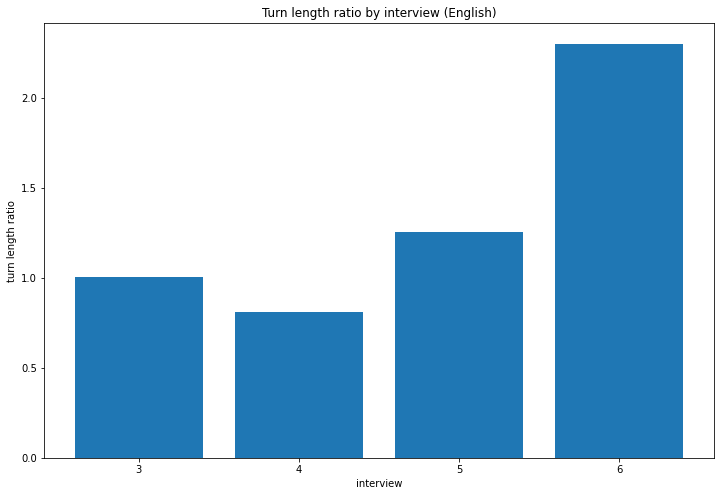

In [31]:
# Plot turn-length ratio by interview and MITI global score

# In MI it is important that the participants speak more than the coaches
turn_len_ratio_list = turn_len_ratio_by_intervew.items()
turn_len_ratio_list = sorted(turn_len_ratio_list)
interview_r, ratio = zip(*turn_len_ratio_list) 
interview_r = [str(item) for item in interview_r]

if LANGUAGE == "Spanish":
    global_ratings_list = interviews_global_ratings_dict.items()
    global_ratings_list = sorted(global_ratings_list) 
    interview_g, rating = zip(*global_ratings_list) 
    interview_g = [str(item) for item in interview_g]

    _ = plt.figure(figsize=(12,8))
    _ = plt.bar(interview_r, ratio)
    _ = plt.plot(interview_g, rating, color="red")
    _ = plt.xlabel("interview")
    _ = plt.ylabel("turn length ratio / global score")
    _ = plt.title(f"Turn length ratio by interview and MITI Global score ({LANGUAGE})")
    plt.legend(["MITI Global Socre", "Turn-length ratio"])
    plt.show()
else:
    _ = plt.figure(figsize=(12,8))
    _ = plt.bar(interview_r, ratio)
    _ = plt.xlabel("interview")
    _ = plt.ylabel("turn length ratio")
    _ = plt.title(f"Turn length ratio by interview ({LANGUAGE})")
    plt.show()

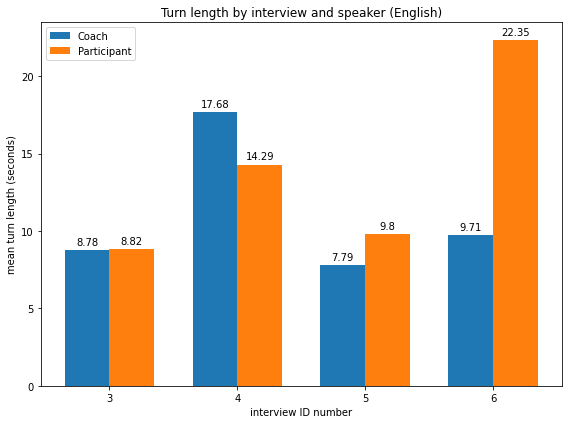

In [32]:
# Get number of turns by speaker type
# turns_by_interview_coach = diarisation_df_annotator.loc["speaker_type"]

# turns_by_interview_coach = diarisation_df_annotator.loc[diarisation_df_annotator["speaker_type"] == "coach"]
# coach_turns_means = turns_by_interview_coach.groupby("interview_id", sort=True)["turn_length"].mean()

# turns_by_interview_participant = diarisation_df_annotator.loc[diarisation_df_annotator["speaker_type"] == "participant"]
# participant_turns_means = turns_by_interview_participant.groupby("interview_id", sort=True)["turn_length"].mean()
# turn_means_by_speaker = pd.concat([coach_turns_means, participant_turns_means])
# turn_means_by_speaker

turns_by_interview_coach = diarisation_df_annotator.groupby(["interview_id","speaker_type"])["turn_length"].mean()
turns_by_interview_coach


turns_by_int_list = turns_by_interview_coach.items()
turns_by_int_list = sorted(turns_by_int_list) 
coach_turn_mean_lengths = [round(y,2) for x, y in turns_by_int_list if x[1] =="coach"]
participant_turn_mean_lengths = [round(y,2) for x, y in turns_by_int_list if x[1] =="participant"]
interview_labels = [str(x[0]) for x, y in turns_by_int_list if x[1] =="participant"]

x = np.arange(len(interview_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, coach_turn_mean_lengths, width, label="Coach")
rects2 = ax.bar(x + width/2, participant_turn_mean_lengths, width, label="Participant")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("mean turn length (seconds)")
ax.set_xlabel("interview ID number")
ax.set_title(f"Turn length by interview and speaker ({LANGUAGE})")
ax.set_xticks(x)
ax.set_xticklabels(interview_labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()